# Validation 2: simulated proteome time profiles vs. starved proteomes by Heinemann (2016)

In [1]:
import seaborn as sns
import pandas as pd

sns.plt.rcParams['svg.fonttype'] = 'none'
pd.set_option('display.max_colwidth', -1)
#pd.set_option('display.float_format', lambda x: '%.3g' % x)
%matplotlib inline

In [4]:
PROTOTYPE = True

In [5]:
from dynamicme.tests.helpme import HelpME
from dynamicme.dynamic import get_cplx_concs

helper = HelpME(prototyping=PROTOTYPE)
solver = helper.solver
me = solver.me

In [6]:
cplx_concs_max = get_cplx_concs(solver)

In [7]:
mu_me = me.solution.x_dict['biomass_dilution']
print 'mu of ME for growth maximization:', mu_me

mu of ME for growth maximization: 0.845886230469


In [8]:
from dynamicme.dynamic import DelayedDynamicME

dyme = DelayedDynamicME(solver)
dyme.delay_model.solver.set_realopts('lp', {'Feasibility tol':1e-15,'Optimality tol':1e-15})
dsolver = dyme.delay_model.solver

## Initial condition proteome directly from measurement: closest to measured proteome at measured growth rate

In [83]:
df_map = pd.read_csv('/home/laurence/ME/data/dynamicME/gene_mapping.csv')[['locus_tag','uniprot']].drop_duplicates()
df_map.rename(columns={'uniprot':'Accession', 'locus_tag':'locus'}, inplace=True)
df_map.shape

(4281, 2)

In [85]:
df_meas = pd.read_csv('/home/laurence/ME/data/dynamicME/heinemannMSB2016/copies_per_cell.csv')
df_meas.loc[:,'Gene'] = df_meas.Gene.apply(lambda x: x.strip())
df_meas.loc[:,'Accession'] = df_meas.Accession.apply(lambda x: x.strip())
df_meas2 = pd.merge(df_meas, df_map, on='Accession', how='left')

In [87]:
print df_meas.shape, df_meas2.shape
print df_meas2.locus.isnull().sum()

(1959, 19) (1959, 20)
10


In [88]:
df_meas2[ df_meas2.locus.isnull()]

,Accession,Gene,Number of peptides,Confidence score,Protein molecular weight,glucose growth,fumarate growth,"persisters, 0.5h","persisters, 1h","persisters, 2h","persisters, 4h","persisters, 8h","starved, 0.5h","starved, 1h","starved, 2h","starved, 4h","starved, 8h","starved from fumarate, 1h","starved from fumarate, 8h",locus
21,P23477,addB,1,49.42,134541.50390,28.013533,26.221268,34.002321,43.448536,46.380660,73.680545,91.004722,34.747901,36.491863,45.273767,51.662163,53.305424,43.172337,52.149596,NaN
257,B6WQ64,DESP,2,37.74,33121.53576,130.058423,53.481760,41.207917,50.239175,25.061914,176.609026,189.673526,57.091771,32.246082,26.980046,69.162761,67.135518,122.205731,42.383914,NaN
517,D9IX93,gsiB,13,737.39,56416.73288,393.796785,449.701815,421.934806,431.609440,399.778717,466.922375,521.325535,399.640708,440.892803,417.453902,423.429722,406.817035,461.677168,446.728491,NaN
618,B1VC82,IPF_,1,36.25,22440.46564,3.379006,15.437082,16.287757,29.751456,11.312001,62.870462,33.392259,15.012298,9.658716,8.617621,4.334455,9.046846,8.636699,22.192101,NaN
862,D0EX67,nagZ,9,414.50,37552.86975,205.032223,190.643388,195.101416,197.220207,214.598933,207.745950,148.064802,194.093419,193.061516,175.737776,186.781217,178.324948,193.111978,171.636656,NaN
1076,Q5H777,puuA,4,223.49,53125.22576,120.847903,73.786126,49.915976,29.957390,11.167931,10.788047,17.800781,46.943171,36.149047,5.984332,24.276985,26.207066,47.218606,40.347885,NaN
1079,Q5H776,puuD,4,199.48,27977.37842,229.127028,118.823148,205.547632,210.761369,195.858777,150.320442,41.945877,160.793262,158.676915,111.985997,74.952456,36.160461,173.841837,55.634770,NaN
1080,Q5H772,puuE,5,307.05,44682.75437,110.152780,80.131878,62.615022,56.629225,33.710676,11.401569,7.907996,53.174457,42.908285,32.505627,21.995824,19.986585,89.522971,18.301583,NaN
1283,Q2A0K9,sbcB,2,92.25,53429.92251,12.446158,15.804239,12.235887,12.621380,15.790039,13.865383,10.020436,9.877681,10.504676,13.534290,11.526514,12.200717,16.109071,14.691907,NaN
1958,B8LFD5,lacR,3,130.09,38834.18930,42.236561,33.691170,41.276358,38.084975,34.135255,30.326345,30.319174,38.097170,31.831561,43.208011,39.187138,37.696396,37.062722,78.526125,NaN


In [89]:
df_meas_mg1655 = df_meas2[ ~df_meas2.locus.isnull()]

In [90]:
df_meas_mg1655.shape

(1949, 20)

## Convert measured abundances to mass fraction
- Normalize <1 accounting for estimated mass of protein not measured

In [92]:
df_meas_mg1655.head(2)

,Accession,Gene,Number of peptides,Confidence score,Protein molecular weight,glucose growth,fumarate growth,"persisters, 0.5h","persisters, 1h","persisters, 2h","persisters, 4h","persisters, 8h","starved, 0.5h","starved, 1h","starved, 2h","starved, 4h","starved, 8h","starved from fumarate, 1h","starved from fumarate, 8h",locus
0,P31119,aas,3,69.91,80630.57813,15.091924,13.677027,12.570075,16.717949,16.029284,17.887883,8.195630,13.172302,12.891399,14.870478,15.033226,13.552355,15.759730,13.907601,b2836
1,P0ABD5,accA,23,1518.59,35201.29042,1476.171885,1444.469676,1448.551257,1484.239242,1578.307362,1586.719694,1483.518528,1576.972572,1588.894574,1582.169785,1591.260882,1675.725598,1335.323299,1434.464299,b0185


In [96]:
#cols_meta = ['Accession','Gene', 'Number of peptides', 'Confidence score', 'Protein molecular weight', 'locus']
def to_mf_df(col):
    masses = df_meas_mg1655['Protein molecular weight'] * df_meas_mg1655[col]
    mfs = masses/sum(masses)
    dfi = pd.DataFrame.from_dict({'locus':df_meas_mg1655.locus, 'mf':mfs})
    return dfi

df_mf_glc = to_mf_df('glucose growth')
df_mf_fum = to_mf_df('fumarate growth')

# Glucose to Fumarate switch simulation

In [98]:
meas_dict_glc = {r['locus']:r['mf'] for i,r in df_mf_glc.iterrows()}
meas_dict_fum = {r['locus']:r['mf'] for i,r in df_mf_fum.iterrows()}

In [99]:
print sum(meas_dict_glc.values()), sum(meas_dict_fum.values())

0.999725143717 0.999696972596


# Get simulated proteome closest to measured
- L1 (drops potential outliers)
- L2 (tries to get match everything)
    - should pre-process to remove outliers?

In [101]:
mu_meas_glc = 0.58

In [113]:
%%time

from cobrawe.fit import FitME

fit = FitME(me)
#me_nlp = fit.me_nlp
#me_nlp.compiled_expressions = None
sol,stat,hs = fit.fit_mass_frac(meas_dict_glc, mu_meas_glc, norm='l1')

Adding total mass fraction variable/constraint.
Adding individual gene mass fraction variables/constraints.
Adding variables/constraints for error minimization.
Solving optimization problem.
CPU times: user 15.5 s, sys: 53.3 ms, total: 15.6 s
Wall time: 15.4 s


In [114]:
print stat

optimal


## Initialize dynamicME with this feasible initial proteome and growth rate

In [115]:
cplx_concs = get_cplx_concs(solver)
cplx_conc_dict0 = dict(cplx_concs)

In [116]:
import json

fname = '/home/laurence/ME/data/dynamicME/production/cplx_conc_meas_MSB16_glc.csv'
print fname
with open(fname,'w') as f:
    json.dump(cplx_conc_dict0, f)

/home/laurence/ME/data/dynamicME/production/cplx_conc_meas_MSB16_glc.csv


# Validate Glc --> Fum switch (Heinemann, MSB, 2016)

In [117]:
import warnings

T = 10   # hours
V = 1.   # L
X0 = 0.00675 / V  # g/L
c0_dict = {'glc__D_e': 0.4,
           'ac_e': 0.0,
           'fum_e':0.0}

### Convert from g/L to mmol
mids_remove = []
for mid,c in c0_dict.iteritems():
    try:        
        met = me.metabolites.get_by_id(mid)    
        c0_dict[met.id] = c / met.formula_weight * 1000
    except KeyError:
        warnings.warn('Model has no metabolite: %s. Will remove it from c0_dict' % mid)
        mids_remove.append(mid)

for mid in mids_remove:
    c0_dict.pop(mid)
        
### Set max uptake rate
LB_EX = -10.
LB_O2 = -20.

lb_dict={}
ub_dict={}

for mid in c0_dict.keys():
    try:
        rxn = dyme.get_exchange_rxn(mid)    
        if rxn.id is 'EX_o2_e':
            lb = LB_O2
        else:
            lb = LB_EX
        rxn.lower_bound = lb
        lb_dict[rxn.id] = lb
    except KeyError:
        warnings.warn('Model has no metabolite: '+ mid)

me.reactions.EX_o2_e.lower_bound = -20.
lb_dict[me.reactions.EX_o2_e.id] = -20.
        
print c0_dict
print lb_dict

{'ac_e': 0.0, 'fum_e': 0.0, 'glc__D_e': 2.220299442904667}
{'EX_o2_e': -20.0, 'EX_glc_e': -10.0, 'EX_ac_e': -10.0, 'EX_fum_e': -10.0}


In [118]:
import numpy as np
cvals = np.array(cplx_conc_dict0.values())
cvals[ cvals>0].min()

9.5893607090303223e-09

In [119]:
dyme = DelayedDynamicME(solver)

In [120]:
solver.set_realopts('lp', {'Feasibility tol':1e-15, 'Optimality tol':1e-15})

In [121]:
from cobrame import MetabolicReaction

if PROTOTYPE:
    fluxes_plot = ['ACONTa_CPLX0-7760_mod_4fe4s', 'ACONTb_CPLX0-7760_mod_4fe4s', 'ACKr_reverse']
else:
    #fluxes_plot = [r.id for r in dsolver.me.reactions if isinstance(r,MetabolicReaction)]
    fluxes_plot = [r.id for r in dsolver.me.reactions]

In [122]:
len(fluxes_plot)

3

# 1. Glucose phase

In [130]:
%%time
extra_rxns_tracked = list(set(['EX_o2_e'] + fluxes_plot + ['biomass_dilution']))

T = 2.5
dt = 0.5
H = dt

result_glc = dyme.simulate_batch(
    T,    
    c0_dict,
    X0,
    prec_bs=1e-3,
    ZERO_CONC=0.,
    extra_rxns_tracked=extra_rxns_tracked,
    lb_dict={},
    verbosity=2,
    dt = dt,
    H = H,
    cplx_conc_dict0=cplx_conc_dict0)

Metabolite ac_e depleted.
Metabolite fum_e depleted.
Metabolite glc__D_e available.
Using default LB=-1000 for EX_glc_e
Computing new uptake rates
Biomass at t=0.5: 0.0134967
Concentrations: {'ac_e': 0.00052232286690241951, 'fum_e': 0.0, 'glc__D_e': 2.176208122125352}
Growth rate: 1.9990234375
Metabolite ac_e available.
Using default LB=-1000 for EX_ac_e
Metabolite fum_e depleted.
Metabolite glc__D_e available.
Using default LB=-1000 for EX_glc_e
Computing new uptake rates
Biomass at t=1: 0.0269868
Concentrations: {'ac_e': 0.0076141296012957969, 'fum_e': 0.0, 'glc__D_e': 2.12249423876818}
Growth rate: 1.9990234375
Metabolite ac_e available.
Using default LB=-1000 for EX_ac_e
Metabolite fum_e depleted.
Metabolite glc__D_e available.
Using default LB=-1000 for EX_glc_e
Computing new uptake rates
Biomass at t=1.5: 0.0539605
Concentrations: {'ac_e': 0.030571461365009364, 'fum_e': 0.0, 'glc__D_e': 2.063613349496312}
Growth rate: 1.9990234375
Metabolite ac_e available.
Using default LB=-1000

# 2. Fumarate phase starting from glucose end state

In [152]:
### Proteome
cplx_conc_dict_glc = get_cplx_concs(solver)
### Update met concs
c0_dict_glc = result_glc['concentration'][-1].copy()
### Add fumuarate and remove glucose suddenly
c0_dict_glc['fum_e'] = 20 # Add plenty of fumarate since much biomass accumulated by now
c0_dict_glc['glc__D_e'] = 0.
### Init biomass
X0_glc = result_glc['biomass'][-1]

In [153]:
T = 5
dt = 0.5
H = dt

result_fum = dyme.simulate_batch(
    T,    
    c0_dict_glc,
    X0_glc,
    prec_bs=1e-3,
    ZERO_CONC=0.,
    extra_rxns_tracked=extra_rxns_tracked,
    lb_dict={},
    verbosity=2,
    dt = dt,
    H = H,
    cplx_conc_dict0=cplx_conc_dict_glc)

Metabolite ac_e available.
Using default LB=-1000 for EX_ac_e
Metabolite fum_e available.
Using default LB=-1000 for EX_fum_e
Metabolite glc__D_e depleted.
Computing new uptake rates
Biomass at t=0.5: 0.160544
Concentrations: {'ac_e': 0.23990190542671602, 'fum_e': 19.46758387169319, 'glc__D_e': 0.0}
Growth rate: 0.5908203125
Metabolite ac_e available.
Using default LB=-1000 for EX_ac_e
Metabolite fum_e available.
Using default LB=-1000 for EX_fum_e
Metabolite glc__D_e depleted.
Computing new uptake rates
Biomass at t=1: 0.32101
Concentrations: {'ac_e': 0.45947155330219525, 'fum_e': 18.845404567724685, 'glc__D_e': 0.0}
Growth rate: 1.9990234375
Metabolite ac_e available.
Using default LB=-1000 for EX_ac_e
Metabolite fum_e available.
Using default LB=-1000 for EX_fum_e
Metabolite glc__D_e depleted.
Computing new uptake rates
Biomass at t=1.5: 0.60738
Concentrations: {'ac_e': 0.70122080246315455, 'fum_e': 18.545036920338756, 'glc__D_e': 0.0}
Growth rate: 1.7841796875
Metabolite ac_e avail

# Combine the two phases

In [155]:
result = {}
for k in result_glc.keys():
    if k=='time':
        result[k] = result_glc[k] + [result_glc[k][-1] + t for t in result_fum[k]]
    else:
        result[k] = result_glc[k] + result_fum[k]
# Shift time

### Save results

In [156]:
import json
result2 = result.copy()
result2.keys()
result2.pop('basis')

if PROTOTYPE:
    fname = '/home/laurence/ME/data/dynamicME/production/validation2_shift_toy.json'
else:
    fname = '/home/laurence/ME/data/dynamicME/production/validation2_shift_full.json'
with open(fname,'w') as f:
    json.dump(result2, f)

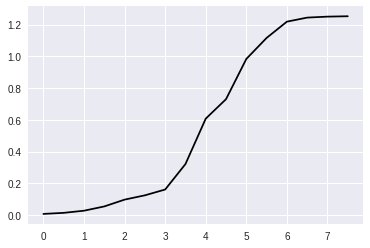

In [157]:
import seaborn as sns
%matplotlib inline

sns.plt.plot(result['time'], result['biomass'])

In [158]:
ex_met_rxn_dict = {m: {'rxn':dyme.get_exchange_rxn(m), 'mw':me.metabolites.get_by_id(m).formula_weight} for m in c0_dict.keys()}
ex_met_rxn_dict

{'ac_e': {'mw': 59.04402,
  'rxn': <MetabolicReaction EX_ac_e at 0x7f66b620f350>},
 'fum_e': {'mw': 114.05628,
  'rxn': <MetabolicReaction EX_fum_e at 0x7f66b6044cd0>},
 'glc__D_e': {'mw': 180.15588,
  'rxn': <MetabolicReaction EX_glc_e at 0x7f66b6044910>}}

In [159]:
import pandas as pd

df_conc = pd.DataFrame(result['concentration'])
### Convert concentrations to g/L
for mid, vals in ex_met_rxn_dict.iteritems():
    df_conc[mid] = df_conc[mid] * vals['mw'] * 0.001

df_time = pd.DataFrame({'time':t, 'biomass':b} for t,b in zip(result['time'], result['biomass']))
df_flux = pd.DataFrame(result['ex_flux'])
df_mu   = pd.DataFrame({'mu':result['growth_rate']})
df_result = pd.concat([df_time, df_conc, df_flux, df_mu], axis=1)

In [164]:
dsplot = pd.melt(df_result, id_vars='time', value_vars=['biomass','ac_e','glc__D_e','fum_e'])
dsplot.time = pd.to_numeric(dsplot.time)
dsplot['category'] = 'Metabolite'
dsplot.loc[ dsplot.variable=='biomass', 'category'] = 'Biomass'

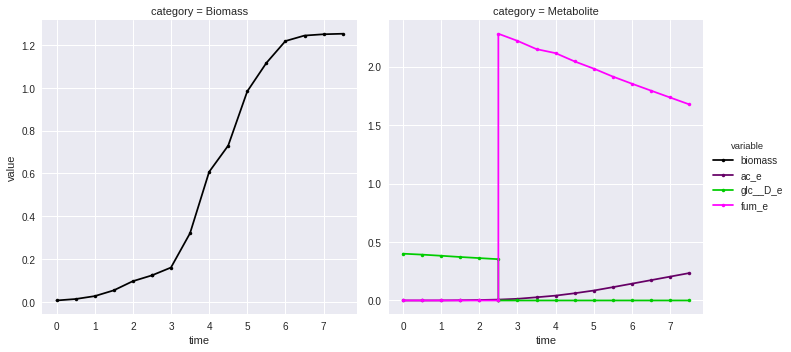

In [165]:
colors = [
'#000000', # biomass
'#660066', # acetate
'#00CC00', # glucose
'#FF00FF', # fumarate
'#0000FF', # lactate
'#FF0000', # maltose
]

colpal = sns.color_palette(colors)
sns.set_palette(colpal)

g = sns.FacetGrid(data=dsplot, hue='variable', col='category', sharey=False, size=5)

g.map(sns.plt.plot, 'time', 'value', linestyle='-', marker='.')
g.add_legend()

In [166]:
if PROTOTYPE:
    complexes_plot = ['IPPMIa_E_c', 'ACKr_reverse_E_c', 'CPLX0-7760_mod_4fe4s','CPLX0-7761_mod_4fe4s']
else:
    complexes_plot = ['3-ISOPROPYLMALISOM-CPLX_mod_4fe4s', 'ACETATEKINA-MONOMER_mod_mg2', 'CPLX0-7659']

In [172]:
fluxes_plot2 = []

for rid in fluxes_plot:
    rxn = dsolver.me.reactions.get_by_id(rid)
    if PROTOTYPE:
        fluxes_plot2.append(rxn.id)
    else:
        if abs(rxn.x) > 10:
            fluxes_plot2.append(rxn.id)
        
print len(fluxes_plot2)

3


In [174]:
df_mu = pd.DataFrame([{'time':t, 'variable':'growth_rate', 'value':c, 'category':'growth'} for t,c in zip(result['time'], result['growth_rate'])] )

df_complex = pd.DataFrame([{'time':t, 'complex':c, 'abundance':cdict[c]} 
                           for t,cdict in zip(result['time'], result['complex']) for c in complexes_plot] )

df_mflux = pd.DataFrame([{'time':t, 'rxn':c, 'flux':cdict[c]} 
                           for t,cdict in zip(result['time'], result['rxn_flux']) for c in fluxes_plot2] )

df_complex.loc[:,'category'] = 'complex'
df_mflux.loc[:,'category'] = 'flux'

dsplot_all = pd.concat([dsplot,
                        df_mu,
                          df_complex.rename(columns={'complex':'variable', 'abundance':'value'}),
                          df_mflux.rename(columns={'rxn':'variable', 'flux':'value'})])

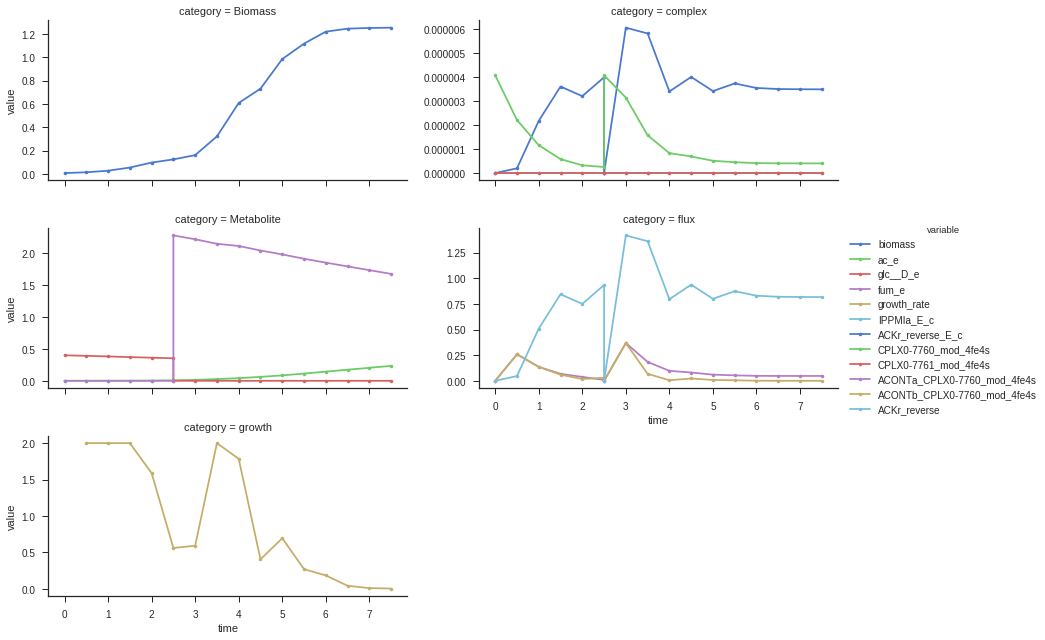

In [175]:
sns.set_style('ticks')
palette = sns.color_palette('muted', len(dsplot_all.variable.unique()))
g = sns.FacetGrid(data=dsplot_all, hue='variable', sharey=False, size=3, col='category', palette=palette,
                  aspect=2, col_wrap=2, col_order=['Biomass','complex','Metabolite','flux','growth'])
g.map(sns.plt.plot, 'time', 'value', linestyle='-', marker='.')
g.add_legend()

## Proteome mol (mass) fractions

In [178]:
from stressme.plot import stacked_bar

In [179]:
df_cplx = pd.DataFrame([{'cplx':k, 'conc':v, 'time':result['time'][i]} for i,r in enumerate(result['complex']) for k,v in r.iteritems()])

times = df_cplx.time.unique()
for t in times:
    dfi = df_cplx[ df_cplx.time==t]
    mtot = dfi.conc.sum()
    b = (df_cplx.time==t).values
    df_cplx.loc[b,'molf'] = df_cplx.loc[b,'conc'] / mtot
    
df_var = df_cplx.groupby('cplx').molf.var().reset_index()
df_var.molf.min()
df_var.molf.max()
N_PLOT = 10
vary_cplxs = df_var.sort_values('molf', ascending=False)['cplx'][0:N_PLOT].values
vary_cplxs

array(['CYTK2_E_c', 'CYTK2_reverse_E_c', 'FUMARASE-A_mod_4fe4s',
       'ATPS4r_E_c', 'GAPD_E_c', 'PGK_reverse_E_c', 'ENO_E_c',
       'PGM_reverse_E_c', 'ADHE-CPLX_mod_fe2', 'FORti_E_c'], dtype=object)

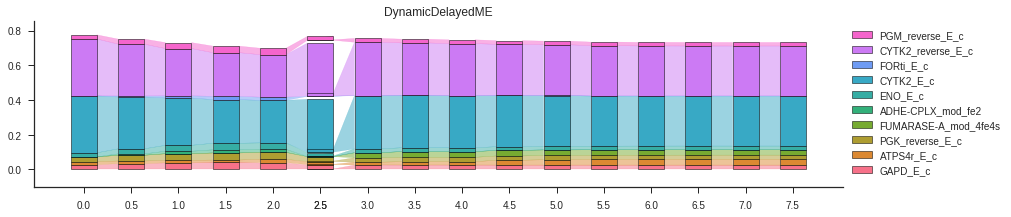

In [180]:
dsplot_cplx = df_cplx[ df_cplx.cplx.isin(vary_cplxs)]
dsplot_cplx.loc[:,'group'] = 'DynamicDelayedME'
stacked_bar('time', 'molf', dsplot_cplx, 'cplx', 'group', aspect=4)